In [1]:
# import necesaary packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# set data visualizations 

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (20, 10) 

In [17]:
# load the data

from sklearn.datasets import load_iris

data = load_iris()
dataframe = pd.DataFrame(data.data, columns=data.feature_names)
dataframe['target'] = data.target
dataframe["species"] = dataframe["target"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

In [13]:
# overview of data

print(dataframe.head())
print(dataframe.info())
print(dataframe.describe())
print(dataframe.shape)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float

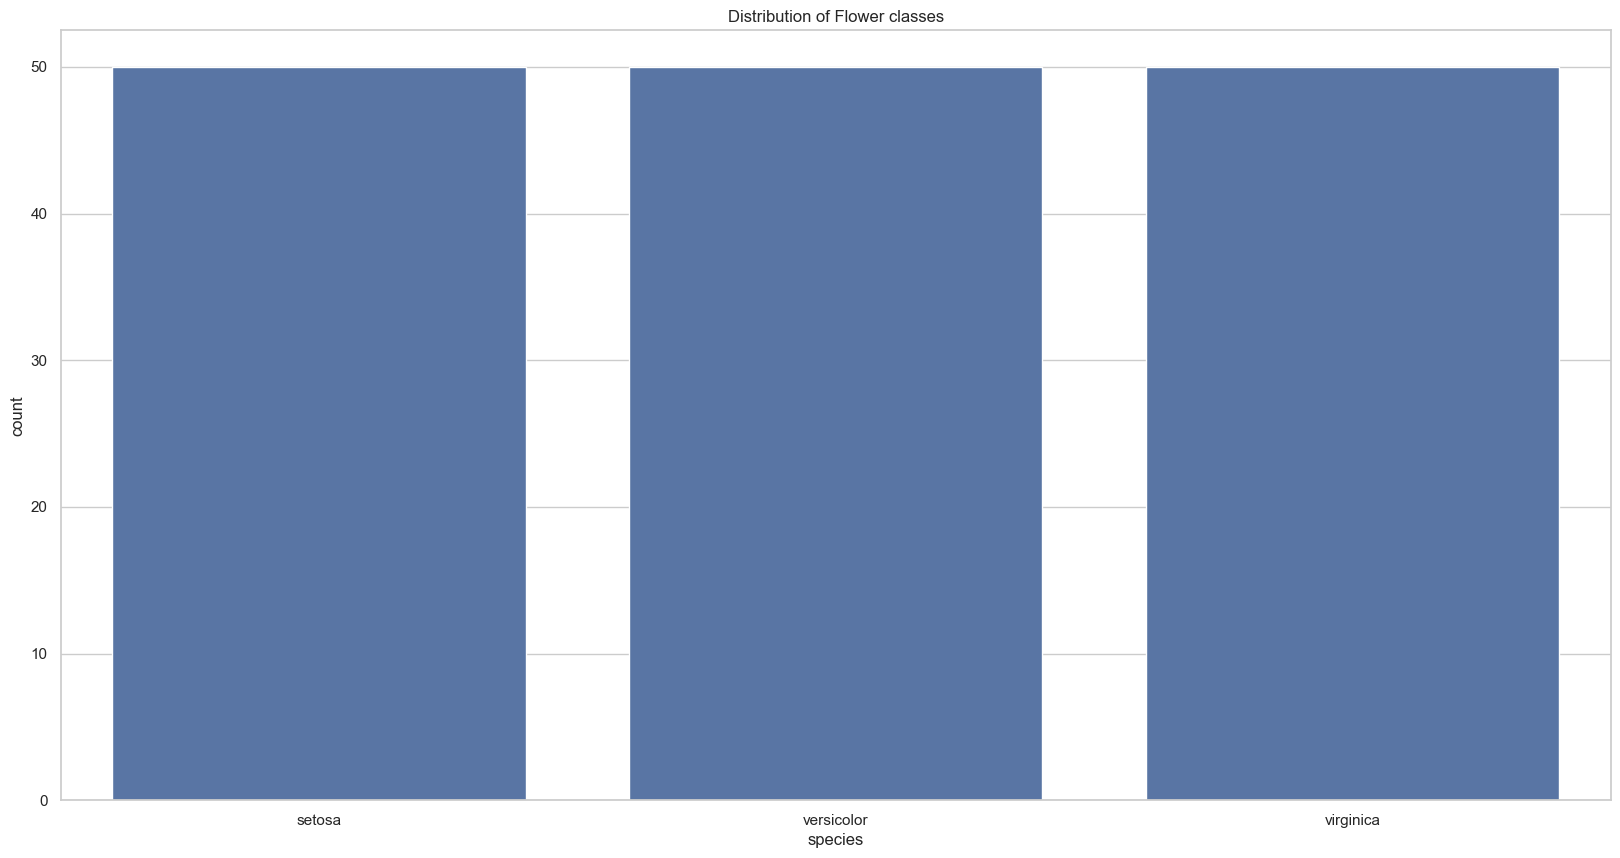

In [19]:
# countplot of flower classes

sns.countplot(x='target', data=dataframe)
plt.xticks([0, 1, 2], ["setosa", "versicolor", "virginica"])
plt.xlabel('species')
plt.title('Distribution of Flower classes')
plt.show()

In [29]:
# seperate the dataset into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=100)

In [30]:
# train classifier using entropy

from sklearn.tree import DecisionTreeClassifier

model_clf = DecisionTreeClassifier(criterion="entropy", random_state=100,
                                max_depth=3, min_samples_leaf=5)
model_clf.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,100
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [31]:
# make precitions using the test set 

y_pred = model_clf.predict(X_test)
y_pred

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2])

In [32]:
# evaluate model accuracy

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9666666666666667
Confusion Matrix:
 [[11  0  0]
 [ 0  5  1]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91         6
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



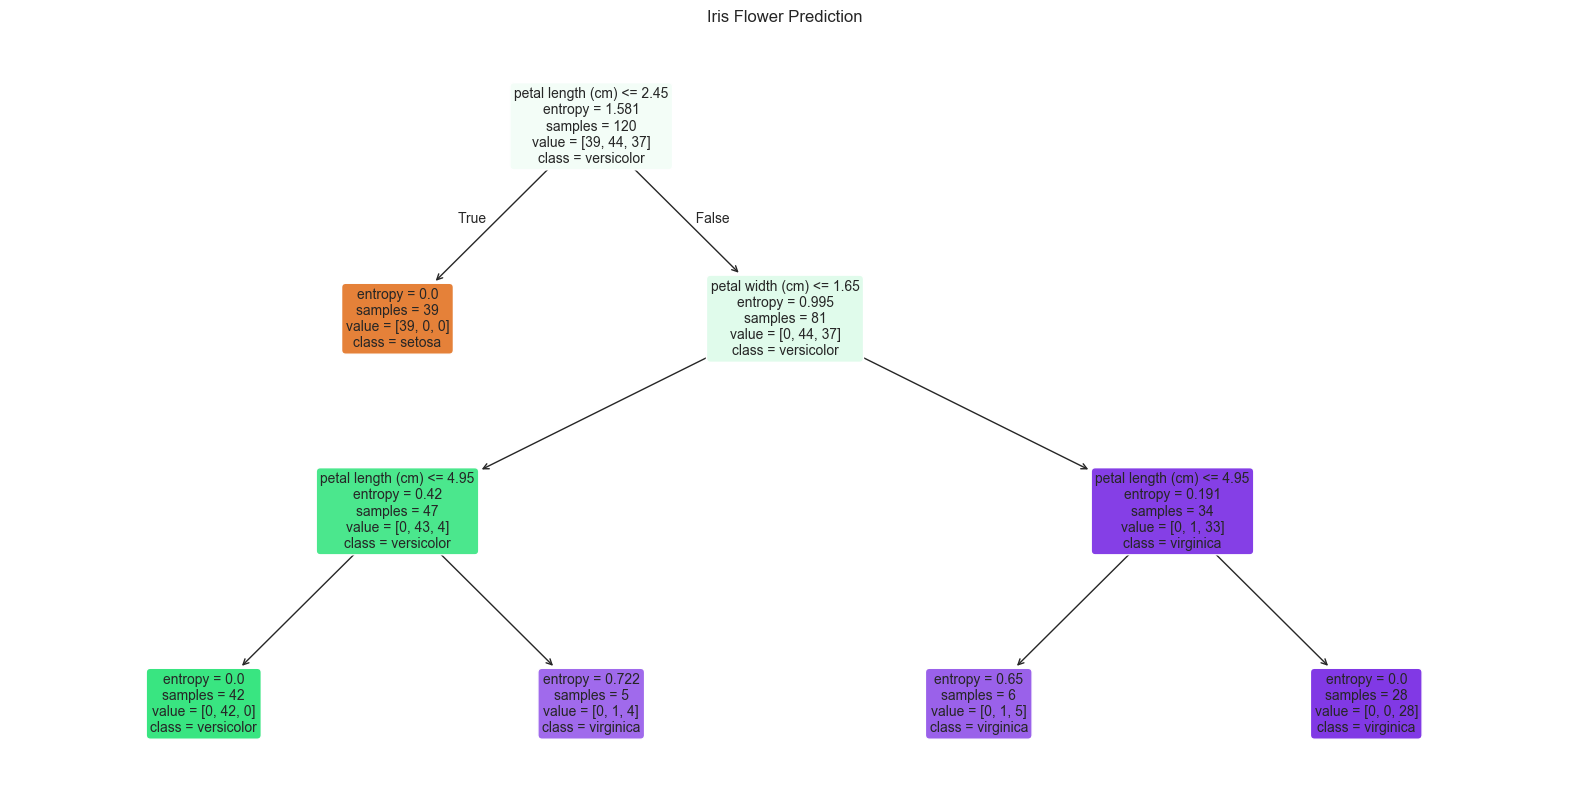

In [34]:
# plot decision tree

from sklearn.tree import plot_tree

plot_tree(model_clf, feature_names=data.feature_names, class_names=["setosa", "versicolor", "virginica"], filled=True, rounded=True, fontsize=10)
plt.title("Iris Flower Prediction")
plt.show()

In [ ]:

feature_importance= pd.Series(model_clf.feature_importances_, index=data.feature_names)
feature_importance.nlargest(
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()